In [4]:
import numpy as np
import cv2
import math
import matplotlib.image as mpimg


%matplotlib widget
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [11]:
org_img  = cv2.imread('images/original_image.jpg')
temp_img = cv2.imread('images/template_image.jpg')

org_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)
temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)

colors = ('r', 'g', 'b')

In [8]:
def calculate_cdf(histogram):
    
    cdf = histogram.cumsum()
    norm_cdf = cdf/ float(cdf.max())
    
    return norm_cdf

def calculate_lookup(src_cdf, ref_cdf):
    lookup_table = np.zeros(256)
    lookup_val = 0
    
    for src_pixel_val in range(len(src_cdf)):
        lookup_val
        for ref_pixel_val in range(len(ref_cdf)):
            if ref_cdf[ref_pixel_val] >= src_cdf[src_pixel_val]:
                lookup_val = ref_pixel_val
                break
        lookup_table[src_pixel_val] = lookup_val
    return lookup_table

def match_histogram(src_img, ref_img):
    src_b, src_g, src_r = cv2.split(src_img)
    ref_b, ref_g, ref_r = cv2.split(ref_img)
    
    src_hist_b, _bin0 = np.histogram(src_b.flatten(), 256, [0,256])
    src_hist_g, _bin1 = np.histogram(src_g.flatten(), 256, [0,256])
    src_hist_r, _bin2 = np.histogram(src_r.flatten(), 256, [0,256])
    
    ref_hist_b, _bin3 = np.histogram(ref_b.flatten(), 256, [0,256])
    ref_hist_g, _bin3 = np.histogram(ref_g.flatten(), 256, [0,256])
    ref_hist_r, _bin3 = np.histogram(ref_r.flatten(), 256, [0,256])
    
    src_cdf_b = calculate_cdf(src_hist_b)
    src_cdf_g = calculate_cdf(src_hist_g)
    src_cdf_r = calculate_cdf(src_hist_r)
    
    ref_cdf_b = calculate_cdf(ref_hist_b)
    ref_cdf_g = calculate_cdf(ref_hist_g)
    ref_cdf_r = calculate_cdf(ref_hist_r)
    
    blue_lookup_table = calculate_lookup(src_cdf_b, ref_cdf_b)
    green_lookup_table = calculate_lookup(src_cdf_g, ref_cdf_g)
    red_lookup_table = calculate_lookup(src_cdf_r, ref_cdf_r)
    
    blue_after_tranform = cv2.LUT(src_b, blue_lookup_table)
    green_after_tranform = cv2.LUT(src_g, green_lookup_table)
    red_after_tranform = cv2.LUT(src_r, red_lookup_table)

    image_after_matching = cv2.merge([blue_after_tranform, green_after_tranform, red_after_tranform])
    image_after_matching = cv2.convertScaleAbs(image_after_matching)
    
    return image_after_matching     

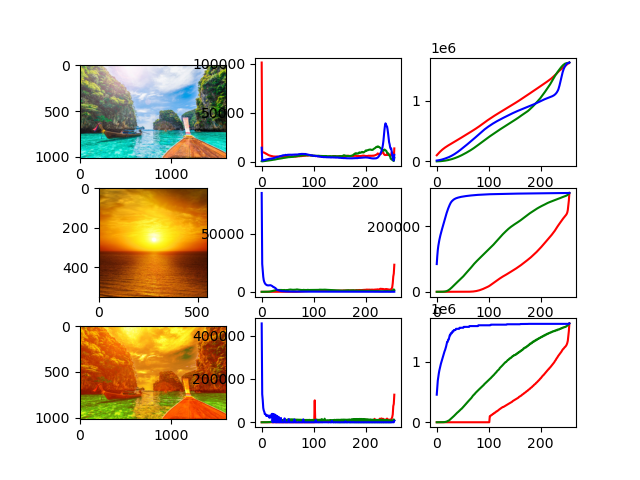

In [13]:
output_img = match_histogram(org_img, temp_img)


fig2,axs = plt.subplots(3,3)
axs[0, 0].imshow(org_img)
axs[1, 0].imshow(temp_img)
axs[2, 0].imshow(output_img)

for i, color in enumerate(colors):
    eq_orgimg = cv2.calcHist([org_img], [i], None, [256], [0,256])
    axs[0,1].plot(eq_orgimg, color = color)
    axs[0,2].plot(eq_orgimg.cumsum(), color = color)



for i, color in enumerate(colors):
    eq_tempimg = cv2.calcHist([temp_img], [i], None, [256], [0,256])
    axs[1,1].plot(eq_tempimg, color = color)
    axs[1,2].plot(eq_tempimg.cumsum(), color = color)


for i, color in enumerate(colors):
    eq_outimg = cv2.calcHist([output_img], [i], None, [256], [0,256])
    axs[2,1].plot(eq_outimg, color = color)
    axs[2,2].plot(eq_outimg.cumsum(), color = color)